In [1]:
import networkx as nx
import lxml
from lxml import etree
import matplotlib.pyplot as plt

import collections
from copy import deepcopy

In [2]:
rom_path = "./ltcs180_textbook/02-getting-data/data/folger/xml/Rom.xml"
oth_path = "./ltcs180_textbook/02-getting-data/data/folger/xml/Oth.xml"
ham_path = "./ltcs180_textbook/02-getting-data/data/folger/xml/Ham.xml"

NSMAP = {'tei': 'http://www.tei-c.org/ns/1.0'}

## Intermediate Exercises

1. In this exercise, we’ll ask you to create and draw a character network for
Shakespeare’s Romeo and Juliet and Othello. The XML encoded plays
can be found at data/folger/xml/Rom.xml and data/folger/xml/Oth.xml.
Compare the two visualizations to that of Hamlet. Comment on any
differences you observe.

In [3]:
def character_network(tree):
    # from HDA 2.8a
    G = nx.Graph()
    # extract a list of speaker turns for each scene in a play
    for scene in tree.iterfind('.//tei:div2[@type="scene"]', NSMAP):
        speakers = scene.findall('.//tei:sp', NSMAP)
        # iterate over the sequence of speaker turns...
        for i in range(len(speakers) - 1):
            # ... and extract pairs of adjacent speakers
            try:
                speaker_i = speakers[i].attrib['who'].split(
                '_')[0].replace('#', '')
                speaker_j = speakers[i + 1].attrib['who'].split(
                '_')[0].replace('#', '')
                # if the interaction between two speakers has already
                # been attested, update their interaction count
                if G.has_edge(speaker_i, speaker_j):
                    G[speaker_i][speaker_j]['weight'] += 1
                # else add an edge between speaker i and j to the graph
                else:
                    G.add_edge(speaker_i, speaker_j, weight=1)
            except KeyError:
                continue
    return G

def parse_etree(path):
    tree = lxml.etree.parse(path)
    G = character_network(tree.getroot())
    return tree, G

def make_network_graph(orig_graph):
    G = deepcopy(orig_graph)
    interactions = collections.Counter()
    for speaker_i, speaker_j, data in G.edges(data=True):
        interaction_count = data['weight']
        interactions[speaker_i] += interaction_count
        interactions[speaker_j] += interaction_count
    nodesizes = [interactions[speaker] * 5 for speaker in G]

    # Create an empty figure of size 15x15
    fig = plt.figure(figsize=(15, 15))
    # Compute the positions of the nodes using the spring layout algorithm
    pos = nx.spring_layout(G, k=0.5, iterations=200)
    # Then, add the edges to the visualization
    nx.draw_networkx_edges(G, pos, alpha=0.4)
    # Subsequently, add the weighted nodes to the visualization
    nx.draw_networkx_nodes(G, pos, node_size=nodesizes, alpha=0.4)
    # Finally, add the labels (i.e. the speaker IDs) to the visualization
    nx.draw_networkx_labels(G, pos, font_size=14)
    plt.axis('off')
    return plt

<module 'matplotlib.pyplot' from 'c:\\Python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

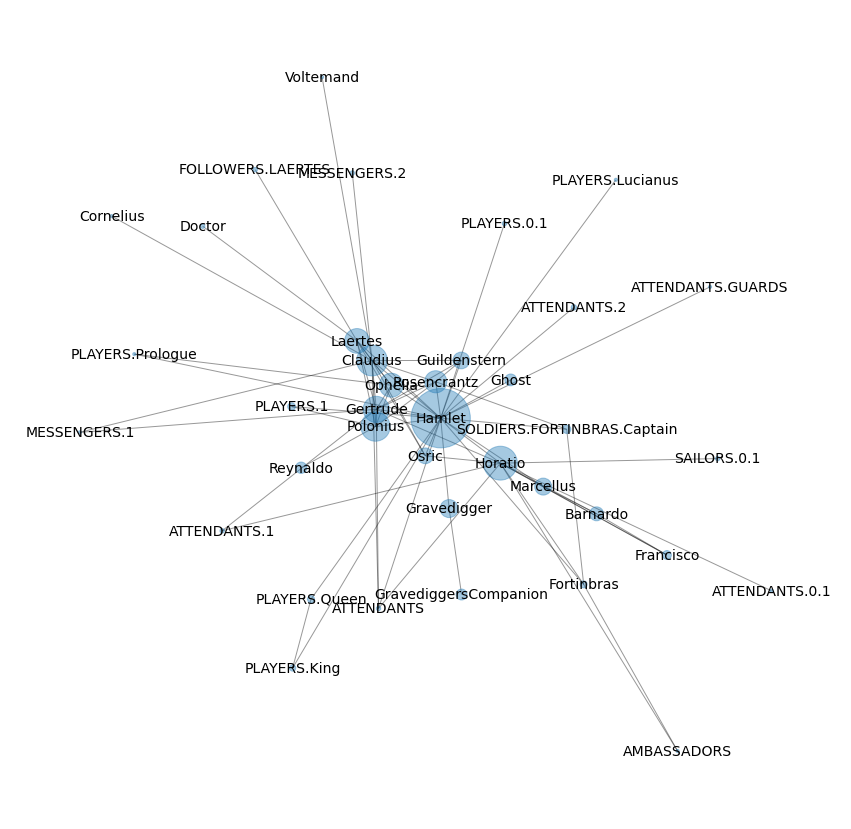

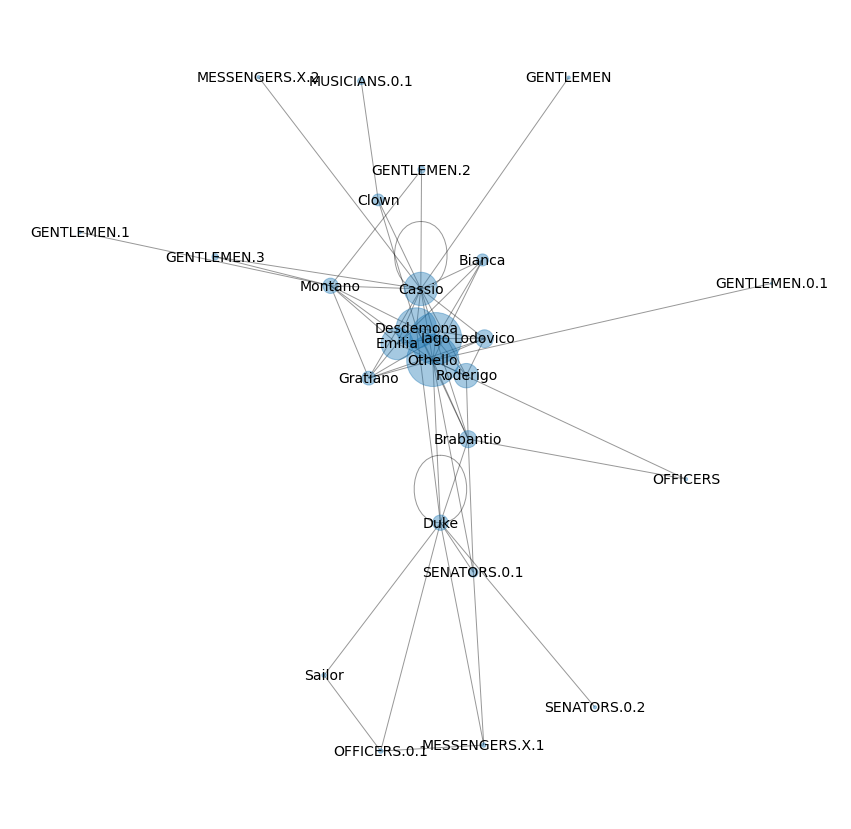

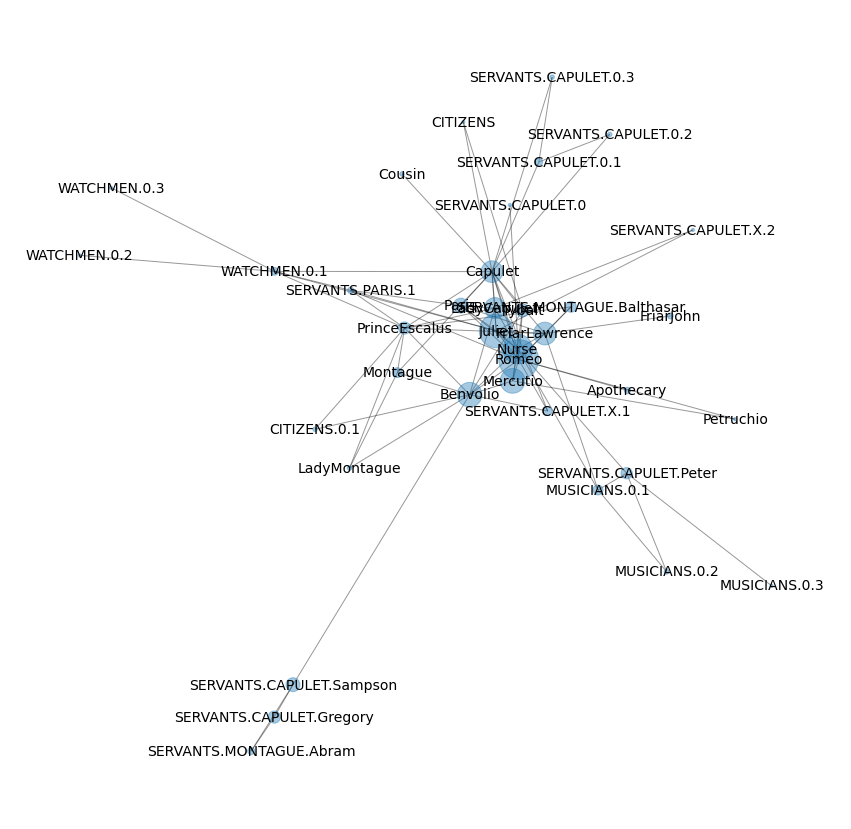

In [4]:
ham_tree, ham_G = parse_etree(ham_path)
oth_tree, oth_G = parse_etree(oth_path)
rom_tree, rom_G = parse_etree(rom_path)

make_network_graph(ham_G)
make_network_graph(oth_G)
make_network_graph(rom_G)

2. Print the number of nodes and edges for each of the three networks (i.e., including the graph for Hamlet). Which network has the largest number of nodes? And which has the largest number of edges?

Hamlet has the largest number of nodes, Romeo and Juliet has the largest number of edges. 

In [5]:
def num_nodes_edges(G):
    return f"N nodes = {G.number_of_nodes()}, N edges = {G.number_of_edges()}"

In [6]:
print(f"Hamlet: {num_nodes_edges(ham_G)}")
print(f"Othello: {num_nodes_edges(oth_G)}")
print(f"Romeo and Juliet: {num_nodes_edges(rom_G)}")

Hamlet: N nodes = 38, N edges = 73
Othello: N nodes = 26, N edges = 64
Romeo and Juliet: N nodes = 37, N edges = 83


3. The character network of Hamlet has 38 nodes and 73 edges. However,
many other edges between nodes could exist. That is to say, Shakespeare
could have chosen to have other and more characters interact with each
other. The extent to which this potential is used is called the density of a
network. Network density is computed as the number of realized edges
divided by the number of potential edges. NetworkX provides the function nx.density() to compute the density of a network. Use this function
to compute the density of the three character networks. Which network
has the highest density? How do the density values compare to the three
visualizations?

Othello has the highest graph density. In the visualization, it has a lower number of nodes than the other graphs and many of them are overlapping, showing that they are close together. 

Romeo and Juliet is the next most dense, as it has a number of side characters that have few interactions with the main characters and are thus far-flung out from the center of the visualization. 

Hamlet has a lot of characters that do not interact with many others, so it makes sense that the density value is the lowest of the three and that there are many nodes that with long edges.

In [7]:
def graph_density(G):
    return f"Density: {nx.density(G)}" 

In [8]:
print(f"Hamlet {graph_density(ham_G)}")
print(f"Othello {graph_density(oth_G)}")
print(f"Romeo and Juliet {graph_density(rom_G)}")

Hamlet Density: 0.10384068278805121
Othello Density: 0.19692307692307692
Romeo and Juliet Density: 0.12462462462462462
